<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/module1-logistic-regression/LS_DS_231_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Logistic Regression

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

## Lecture - Where Linear goes Wrong
### Return of the Titanic 🚢

You've likely already explored the rich dataset that is the Titanic - let's use regression and try to predict survival with it. The data is [available from Kaggle](https://www.kaggle.com/c/titanic/data), so we'll also play a bit with [the Kaggle API](https://github.com/Kaggle/kaggle-api).

In [0]:
!pip install kaggle

In [0]:
# Note - you'll also have to sign up for Kaggle and authorize the API
# https://github.com/Kaggle/kaggle-api#api-credentials

# This essentially means uploading a kaggle.json file
# For Colab we can have it in Google Drive
from google.colab import drive
drive.mount('/content/drive')
%env KAGGLE_CONFIG_DIR=/content/drive/My Drive/

# You also have to join the Titanic competition to have access to the data
!kaggle competitions download -c titanic

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
env: KAGGLE_CONFIG_DIR=/content/drive/My Drive/
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 23.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.15MB/s]


In [0]:
# How would we try to do this with linear regression?
import pandas as pd

train_df = pd.read_csv('train.csv').dropna()
test_df = pd.read_csv('test.csv').dropna()  # Unlabeled, for Kaggle submission

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [0]:
from sklearn.linear_model import LinearRegression

X = train_df[['Pclass', 'Age', 'Fare']]
y = train_df.Survived

linear_reg = LinearRegression().fit(X, y)
linear_reg.score(X, y)

0.08389810726550917

In [0]:
linear_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

array([0.79543117, 0.58610823, 0.67595121, 0.793829  , 0.62090522,
       0.72542107, 0.59848968, 0.58734245, 0.48567063, 0.77627736,
       0.84211887, 0.57052439, 0.7754689 , 0.96621114, 0.70287941,
       0.57673837, 0.72321391, 0.75894755, 0.77968041, 0.50246003,
       0.49858077, 0.7474959 , 0.3542282 , 0.61648435, 0.71300224,
       0.66294608, 0.53175333, 0.77397395, 0.68419387, 0.68395536,
       0.52041202, 0.56814038, 0.79586606, 0.81372012, 0.61068545,
       0.57260627, 0.52525981, 0.58055388, 0.45584728, 0.67976208,
       0.8226707 , 0.84286197, 0.96189157, 0.66724612, 0.68589478,
       0.61846513, 0.63455044, 0.68275686, 0.65738372, 0.45198998,
       0.59988596, 0.63845908, 0.63132487, 0.7888473 , 0.60126246,
       0.79714045, 0.78713803, 0.54643775, 0.42823635, 0.7711724 ,
       0.53552976, 0.55608044, 0.54480459, 0.57031915, 0.65080369,
       0.77958926, 0.6371013 , 0.70993488, 0.71493598, 0.60375943,
       0.54407206, 0.48186138, 0.76576089, 0.75456305, 0.53968

In [0]:
linear_reg.coef_

array([-0.08596295, -0.00829314,  0.00048775])

In [0]:
import numpy as np

test_case = np.array([[1, 5, 500]])  # Rich 5-year old in first class
linear_reg.predict(test_case)

array([1.14845883])

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X, y)
log_reg.score(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7103825136612022

In [0]:
log_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
log_reg.predict(test_case)[0]

1

In [0]:
help(log_reg.predict)

Help on method predict in module sklearn.linear_model.base:

predict(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Predict class labels for samples in X.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape [n_samples]
        Predicted class label per sample.



In [0]:
log_reg.predict_proba(test_case)[0]

array([0.02485552, 0.97514448])

In [0]:
# What's the math?
log_reg.coef_

array([[-0.0455017 , -0.02912513,  0.0048037 ]])

In [0]:
log_reg.intercept_

array([1.45878264])

In [0]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

In [0]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.97514448]])

So, clearly a more appropriate model in this situation! For more on the math, [see this Wikipedia example](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).

For live - let's tackle [another classification dataset on absenteeism](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) - it has 21 classes, but remember, scikit-learn LogisticRegression automatically handles more than two classes. How? By essentially treating each label as different (1) from some base class (0).

In [0]:
# Live - let's try absenteeism!
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


In [0]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip


--2019-02-25 18:18:39--  http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66136 (65K) [application/zip]
Saving to: ‘Absenteeism_at_work_AAA.zip’

Absenteeism_at_work 100%[===================>]  64.59K   254KB/s    in 0.3s    

2019-02-25 18:18:40 (254 KB/s) - ‘Absenteeism_at_work_AAA.zip’ saved [66136/66136]



In [0]:
!unzip Absenteeism_at_work_AAA.zip

Archive:  Absenteeism_at_work_AAA.zip
  inflating: Absenteeism_at_work.arff  
  inflating: Absenteeism_at_work.csv  
  inflating: Absenteeism_at_work.xls  
  inflating: Attribute Information.docx  
  inflating: UCI_ABS_TEXT.docx       


In [0]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [0]:
print(df.shape)
df.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [0]:
pd.set_option('display.max_columns', 500)

In [0]:
X = df.drop(['ID', 'Reason for absence'], axis='columns')

In [0]:
y = df['Reason for absence']

In [0]:
from sklearn.linear_model.logistic import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X, y)
model.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.49864864864864866

In [0]:
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=10000)
model.fit(X, y)
model.score(X,y)

0.5121621621621621

In [0]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=10000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.3783783783783784

## Assignment - real-world classification

We're going to check out a larger dataset - the [FMA Free Music Archive data](https://github.com/mdeff/fma). It has a selection of CSVs with metadata and calculated audio features that you can load and try to use to classify genre of tracks. To get you started:

In [0]:
import pandas as pd
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-02-25 19:10:05--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.13, 2001:620:5ca1:2ff::ce53
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip’

fma_metadata.zip    100%[===================>] 341.81M  24.8MB/s    in 32s     

2019-02-25 19:10:37 (10.8 MB/s) - ‘fma_metadata.zip’ saved [358412441/358412441]

Archive:  fma_metadata.zip
 bunzipping: fma_metadata/README.txt  
 bunzipping: fma_metadata/checksums  
 bunzipping: fma_metadata/not_found.pickle  
 bunzipping: fma_metadata/raw_genres.csv  
 bunzipping: fma_metadata/raw_albums.csv  
 bunzipping: fma_metadata/raw_artists.csv  
 bunzipping: fma_metadata/raw_tracks.csv  
 bunzipping: fma_metadata/tracks.csv  
 bunzipping: fma_metadata/genres.csv  
 bunzipping: fma_metadata/raw_echonest.cs

In [5]:
tracks = pd.read_csv('fma_metadata/tracks.csv', header=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
tracks.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
0,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,...,NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway


In [0]:
pd.set_option('display.max_columns', None)  # Unlimited columns


In [0]:
tracks['track_id'] = tracks['Unnamed: 0'].drop(0)

In [0]:
tracks = tracks.drop(0)

In [29]:
tracks.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1,track_id
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,Hip-Hop,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food,2
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,Hip-Hop,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave,3
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,Hip-Hop,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World,5
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,Pop,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway,10
5,20,0.0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,NaN,[],Niris,13.0,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2.0,2008-11-26 01:42:52,10.0,4.0,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000.0,0.0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311.0,0.0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,NaN,3.0,NaN,[],Spiritual Level,20


In [32]:
tracks.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

This is the biggest data you've played with so far, and while it does generally fit in Colab, it can take awhile to run. That's part of the challenge!

Your tasks:
- Clean up the variable names in the dataframe
- Use logistic regression to fit a model predicting (primary/top) genre
- Inspect, iterate, and improve your model
- Answer the following questions (written, ~paragraph each):
  - What are the best predictors of genre?
  - What information isn't very useful for predicting genre?
  - What surprised you the most about your results?

*Important caveats*:
- This is going to be difficult data to work with - don't let the perfect be the enemy of the good!
- Be creative in cleaning it up - if the best way you know how to do it is download it locally and edit as a spreadsheet, that's OK!
- If the data size becomes problematic, consider sampling/subsetting
- You do not need perfect or complete results - just something plausible that runs, and that supports the reasoning in your written answers

If you find that fitting a model to classify *all* genres isn't very good, it's totally OK to limit to the most frequent genres, or perhaps trying to combine or cluster genres as a preprocessing step. Even then, there will be limits to how good a model can be with just this metadata - if you really want to train an effective genre classifier, you'll have to involve the other data (see stretch goals).

This is real data - there is no "one correct answer", so you can take this in a variety of directions. Just make sure to support your findings, and feel free to share them as well! This is meant to be practice for dealing with other "messy" data, a common task in data science.

In [33]:
tracks.genre_top.isna().sum()

56976

In [34]:
tracks.split.value_counts()

training      84353
test          11263
validation    10958
Name: split, dtype: int64

In [39]:
import matplotlib.pyplot as plt

tracks.isna().sum()

Unnamed: 0                0
comments                  0
date_created           3529
date_released         36280
engineer              91279
favorites                 0
id                        0
information           23425
listens                   0
producer              88514
tags                      0
title                  1025
tracks                    0
type                   6508
active_year_begin     83863
active_year_end      101199
associated_labels     92303
bio                   35418
comments.1                0
date_created.1          856
favorites.1               0
id.1                      0
latitude              62030
location              36364
longitude             62030
members               59725
name                      0
related_projects      93422
tags.1                    0
website               27318
wikipedia_page       100993
split                     0
subset                    0
bit_rate                  0
comments.2                0
composer            

In [0]:
tracks['year_created'] = pd.to_datetime(tracks['date_created.1']).dt.year
tracks['month_created'] = pd.to_datetime(tracks['date_created.1']).dt.month

In [0]:
train = tracks[tracks.split == 'training']

In [49]:
train.genre_top.value_counts()

Rock                   11394
Experimental            8557
Electronic              7662
Hip-Hop                 2910
Folk                    2275
Pop                     1815
Instrumental            1579
International           1124
Classical               1069
Jazz                     462
Old-Time / Historic      445
Spoken                   278
Country                  158
Soul-RnB                 112
Blues                     88
Easy Listening            15
Name: genre_top, dtype: int64

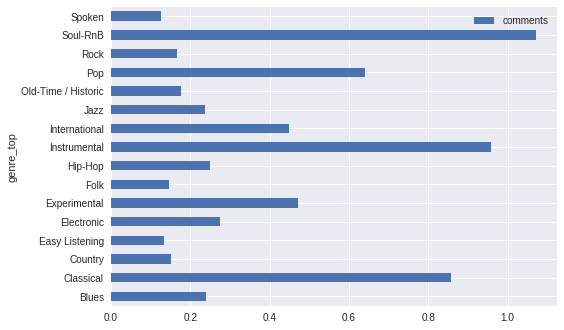

In [55]:
train.pivot_table(index='genre_top', values='comments').plot.barh()

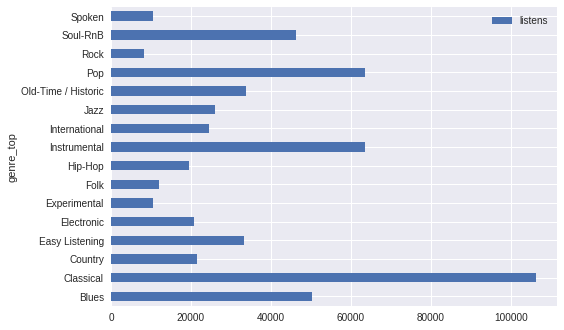

In [58]:
train.pivot_table(index='genre_top', values='listens').plot.barh()

In [65]:
len(train.genre_top.unique())

d = {}

for i in range(0,17):
  d[list(train.genre_top.unique())[i]] = i
  
print(d)

{'Hip-Hop': 0, 'Pop': 1, nan: 2, 'Rock': 3, 'Experimental': 4, 'Folk': 5, 'Jazz': 6, 'Electronic': 7, 'Spoken': 8, 'International': 9, 'Blues': 10, 'Country': 11, 'Old-Time / Historic': 12, 'Soul-RnB': 13, 'Classical': 14, 'Instrumental': 15, 'Easy Listening': 16}


In [68]:
train.genre_top = train.genre_top.map(d)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [79]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5079243841894214

In [72]:
train.year_created.isna().sum()

561

In [73]:
train.shape

(84353, 56)

In [0]:
train = train.dropna(subset=['year_created'])

In [78]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5273057093755967

In [80]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created', 'month_created']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5273057093755967

In [85]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created', 'month_created', 'tracks']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5265419133091465

In [87]:
train.duration.isna().sum()

0

In [88]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created', 'month_created', 'tracks', 'duration']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5262077525300745

In [0]:
train = pd.get_dummies(train, prefix='type', prefix_sep='_', columns=['type'])

In [93]:
train.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1,track_id,year_created,month_created,type_Album,type_Contest,type_Live Performance,type_Radio Program,type_Single Tracks
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,0,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food,2,2008.0,11.0,1,0,0,0,0
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,0,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave,3,2008.0,11.0,1,0,0,0,0
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,0,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World,5,2008.0,11.0,1,0,0,0,0
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,1,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway,10,2008.0,11.0,1,0,0,0,0
5,20,0.0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,NaN,[],Niris,13.0,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2.0,2008-11-26 01:42:52,10.0,4.0,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000.0,0.0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311.0,0.0,2,"[76, 103]","[17, 10, 76, 103]",NaN,978.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,NaN,3.0,NaN,[],Spiritual Level,20,2008.0,11.0,1,0,0,0,0


In [95]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created', 'month_created', 'tracks', 'duration', 'type_Album']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5262077525300745

In [98]:
train.favorites.isna().sum()

0

In [99]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created', 'month_created', 'tracks', 'duration', 'type_Album', 'favorites']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5262554897842276

In [0]:
train['favs_per_listen'] = train.favorites / train.listens

In [102]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments','year_created', 'tracks', 'duration', 'type_Album', 'favorites', 'favs_per_listen']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5263509642925339

In [103]:
train.year_created.value_counts()

2010.0    14457
2009.0    13858
2013.0     9554
2012.0     9413
2011.0     9309
2015.0     7232
2016.0     6674
2008.0     5866
2014.0     5690
2017.0     1739
Name: year_created, dtype: int64

In [0]:
train = pd.get_dummies(train, prefix='year', prefix_sep='_', columns=['year_created'])

In [106]:
train.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1,track_id,month_created,type_Album,type_Contest,type_Live Performance,type_Radio Program,type_Single Tracks,favs_per_listen,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,0,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food,2,11.0,1,0,0,0,0,0.000659,1,0,0,0,0,0,0,0,0,0
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,0,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave,3,11.0,1,0,0,0,0,0.000659,1,0,0,0,0,0,0,0,0,0
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,0,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World,5,11.0,1,0,0,0,0,0.000659,1,0,0,0,0,0,0,0,0,0
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,1,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway,10,11.0,1,0,0,0,0,0.000084,1,0,0,0,0,0,0,0,0,0
5,20,0.0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,NaN,[],Niris,13.0,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2.0,2008-11-26 01:42:52,10.0,4.0,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000.0,0.0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311.0,0.0,2,"[76, 103]","[17, 10, 76, 103]",NaN,978.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,NaN,3.0,NaN,[],Spiritual Level,20,11.0,1,0,0,0,0,0.000738,1,0,0,0,0,0,0,0,0,0


In [108]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments', 'tracks', 'duration', 'type_Album', 'favorites', 'favs_per_listen', 'year_2008.0', 'year_2009.0', 'year_2010.0', 'year_2011.0', 'year_2012.0', 'year_2013.0', 'year_2014.0', 'year_2015.0', 'year_2016.0']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5310292151995417

In [0]:
train['english?'] = (train.language_code == 'en')

In [129]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments', 'tracks', 'duration', 'type_Album', 'favorites', 'favs_per_listen', 'year_2008.0', 'year_2009.0', 'year_2010.0', 'year_2011.0', 'year_2012.0', 'year_2013.0', 'year_2014.0', 'year_2015.0', 'year_2016.0', 'english?']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5284991407294253

In [130]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

X = train[['listens', 'comments', 'tracks', 'duration', 'type_Album', 'favorites', 'favs_per_listen', 'year_2008.0', 'year_2009.0', 'year_2010.0', 'year_2011.0', 'year_2012.0', 'year_2013.0', 'year_2014.0', 'year_2015.0', 'year_2016.0', 'english?', 'interest']]
y = train['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5315543249952263

In [0]:
# What are the best predictors of genre?
# What information isn't very useful for predicting genre?
# What surprised you the most about your results?

# what are the best predictors of genre?

to me it looks like listens, comments and interest were the best predictors of genre. i could feature engineer some more to increase accuracy but i want to work with the housing dataset and submit to kaggle.

# What information isn't very useful for predicting genre?

the number of tracks wasn't very useful.

# What surprised you the most about your results?

i was surprised that whether or not the track was in english didn't help us predict. 

## Resources and stretch goals

- Check out the other .csv files from the FMA dataset, and see if you can join them or otherwise fit interesting models with them
- [Logistic regression from scratch in numpy](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f) - if you want to dig in a bit more to both the code and math (also takes a gradient descent approach, introducing the logistic loss function)
- Create a visualization to show predictions of your model - ideally show a confidence interval based on error!
- Check out and compare classification models from scikit-learn, such as [SVM](https://scikit-learn.org/stable/modules/svm.html#classification), [decision trees](https://scikit-learn.org/stable/modules/tree.html#classification), and [naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html). The underlying math will vary significantly, but the API (how you write the code) and interpretation will actually be fairly similar.
- Sign up for [Kaggle](https://kaggle.com), and find a competition to try logistic regression with
- (Not logistic regression related) If you enjoyed the assignment, you may want to read up on [music informatics](https://en.wikipedia.org/wiki/Music_informatics), which is how those audio features were actually calculated. The FMA includes the actual raw audio, so (while this is more of a longterm project than a stretch goal, and won't fit in Colab) if you'd like you can check those out and see what sort of deeper analysis you can do.